In [189]:
# importing packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer

import scipy.cluster.hierarchy as sch
%matplotlib inline

In [190]:
url = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv'
df = pd.read_csv(url)

df.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


## A. Scatterplots Using 'ggplot'
### A1) `Sodium_100g` vs `Total_Fat_100g` Scatterplot

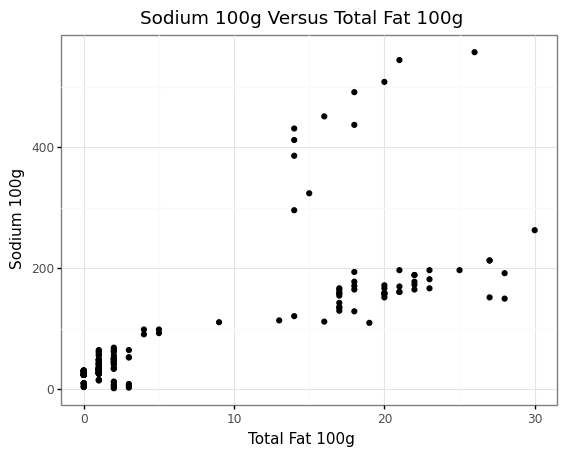

<ggplot: (342340078)>

In [191]:
df1 = df[['Sodium_100g', 'Total_Fat_100g']]

(ggplot(df1, aes(x = 'Total_Fat_100g', y = 'Sodium_100g')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Sodium 100g Versus Total Fat 100g') + 
labs(x = 'Total Fat 100g', y = 'Sodium 100g'))

### A2) `Sodium_100g` vs. `Sugar_100g` Scatterplot

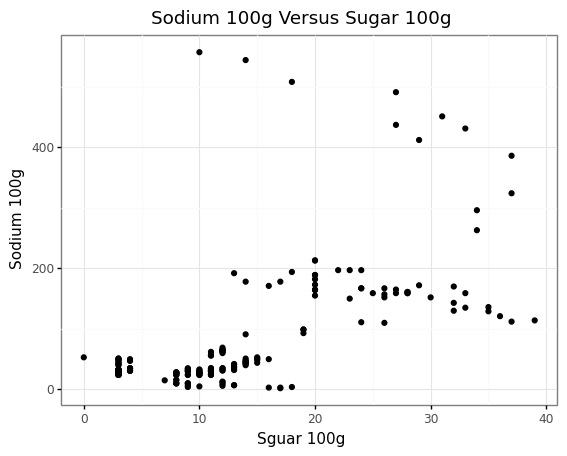

<ggplot: (342232932)>

In [192]:
df2 = df[['Sodium_100g', 'Sugar_100g']]

(ggplot(df2, aes(x = 'Sugar_100g', y = 'Sodium_100g')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Sodium 100g Versus Sugar 100g') + 
labs(x = 'Sguar 100g', y = 'Sodium 100g'))

### A3) `Sugar_100g` vs `Total_Fat_100g` Scatterplot

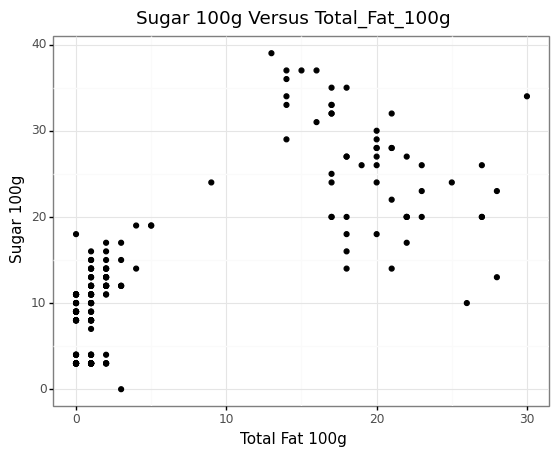

<ggplot: (342140856)>

In [193]:
df3 = df[['Total_Fat_100g', 'Sugar_100g']]

(ggplot(df3, aes(x = 'Total_Fat_100g', y = 'Sugar_100g')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Sugar 100g Versus Total_Fat_100g') + 
labs(x = 'Total Fat 100g', y = 'Sugar 100g'))

## B. Examination of clustering methods

When examining the scatterplots, **Gaussian Mixture Models (EM)** may be the best clustering method. Gaussian Mixture Models (EM) is an algorithm that calculates the probability of a data point beloning to a cluster (probabilistic assignment). Instead of assuming that all of the variables have the same variance, the model explicitly estimates that the variance is. This allows for the consideration of elliptical clusters. When examining the scatterplot, some of the points seemed to conform to an elliptical shape, making it a good candidate for EM. 

**DBSCAN** is a method of density-based clustering that divides a dataset based on the "neighborhood distance" (ε). This algorithm classifies every data point as part of a cluster or as noise. The number of clusters is automatically generated by the model. However, this algorithim is susceptible to variable density clusters and performs poorly with high dimensional data. Our scatterplots show that there is some degree of variability in density. 

The **K-means** algorithm is a method of centroid-based clustering that is relatively simple to implement. The models attempts to classify each object in a dataset to allow the clusters converge to a stable cluster membership. However, there are some assumptions associated with K-means that would not be suitable for this dataset: there are spherical clusters in the dataset and there are roughly the same number of points in each cluster. When examing the scatterplots, we see that none of the graphs fulfill both conditions — rendering K-means a poor choice for our dataset. In addition, this algorithm requires the user to either guess an optimal ***k*** value or make calculations to specity it.


**Agglomerative Hierarchial Clustering** is method of bottom-up clustering to forms clusters based on the distances between objects of the whole dataset. After applying this method, a dendrogram of data is produced, allowing one to view the structure of the information. However, the complexity of the algorithm may be excessive or inapplicable in this data where there may be little to no hierarchy.


## C. Algorithm Implementation
### C1) Prediction: Gaussian Mixture Model (EM) - Predicted Best Performance

[0.7370506230329484, 0.7406259709296275, 0.5876352968459855, 0.6451517600779442, 0.5198793498335005, 0.5342438563085424, 0.3051520255738135, 0.4927108486643138, 0.4470804403975991]


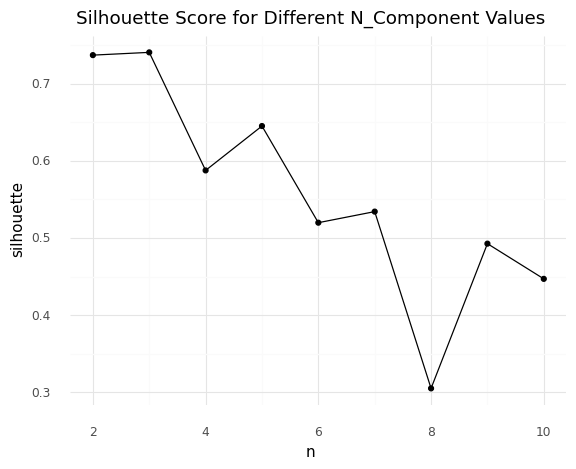

<ggplot: (342240356)>

In [194]:
# EM
features = ['Sodium_100g', 'Total_Fat_100g', 'Sugar_100g']

X = df[features]

z = StandardScaler()

X[features] = z.fit_transform(X)
Xdf = X

sils = []
n_components = [2,3,4,5,6,7,8,9,10]

for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    pred = gmm.predict(X)

    sils.append(silhouette_score(X, pred))

print(sils)
    
sils_df = pd.DataFrame({"n": n_components,
                      "silhouette": sils})

(ggplot(sils_df, aes(x = "n", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different N_Component Values"))


In [195]:
EM = GaussianMixture(n_components = 3)
EM.fit(X)

cluster = EM.predict(X)
print(silhouette_score(X, cluster))

0.7406259709296275


### EM Hyperparameter - Choosing n_components
The 'n_components' hyperparameter was chosen to be 3 for the Gaussian Mixture Model (EM). This number was obtained by running a loop that examined the silhouette scores from models with different n_component values. These were then plotted in a scatterplot to visualize the trend. Ideally, a high silhouette score is preferred as it indicates a high amount of separation and cohesion. For this dataset, I found that the silhouette score was highest when n_component = 3. After this mark, the graph decreased sharply indicating a drop in the silhouette score Thus, '3' was chosen to be the n_components hyperparameter for this model.

### C2) K-means - Predicted Worst Performance

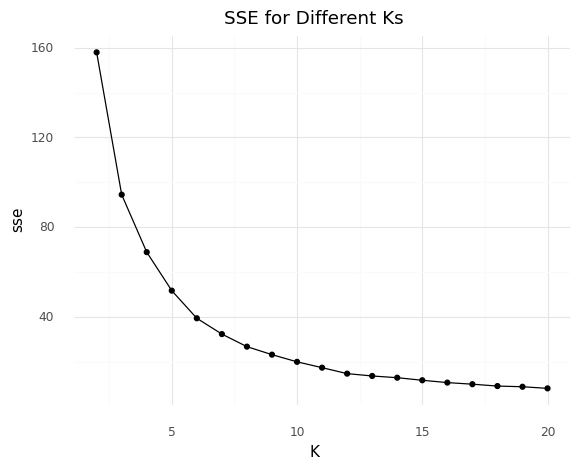

<ggplot: (340016550)>

In [196]:
features = ['Sodium_100g', 'Total_Fat_100g', 'Sugar_100g']

X = df[features]

z = StandardScaler()

X[features] = z.fit_transform(X[features])

ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sse = []
sils = []

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))
    
sse_df = pd.DataFrame({"K": ks,
                      "sse": sse,
                      "silhouette": sils})

(ggplot(sse_df, aes(x = "K", y = "sse")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "SSE for Different Ks"))

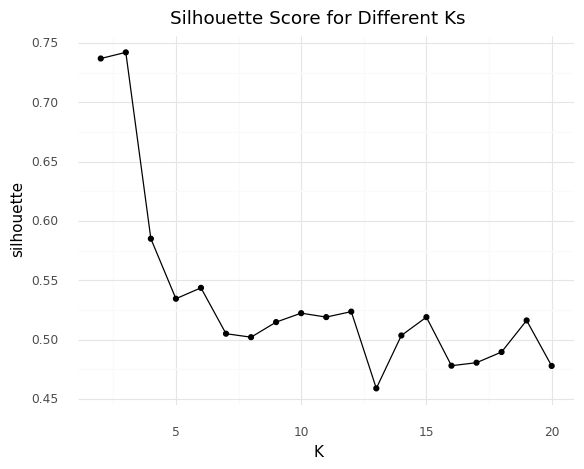

<ggplot: (342298194)>

In [197]:
(ggplot(sse_df, aes(x = "K", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

In [198]:
km = KMeans(n_clusters = 3)
km.fit(X)

km_donuts = km.predict(X)
X["cluster"] = km_donuts

print(silhouette_score(X[features], km_donuts))

0.7422190230687878


### K-Means Hyperparameter - k value

K-Means utilizes the hyperparameter "k" to determine the number of centroids, and allocates every other data point to the nearest cluster whilst keeping the centroids as small as possible. The optimal k value was determined by testing a range of possible k values in the model. The sum of squared errors and silhouette scores were obtained and plotted to illustrate their respective trends. For the graph of sum of squared errors, the elbow method was employed to pick the value of k (3) at which the graph decreased significantly. Similar to the Gaussian Mixture Model, a higher silhouette score is preferred because it indicates high cohesion and separation. The highest silhouette score within this model was also at 3. Thus, '3' was chosen as the k value for this K-Means model.

## D. Performance Evaluation
### Gaussian Mixture Model (EM)

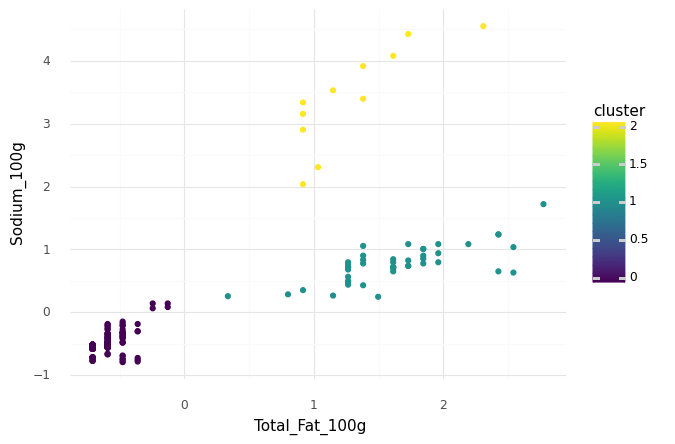

<ggplot: (342298432)>

In [201]:
(ggplot(Xdf, aes(x = "Total_Fat_100g", y = "Sodium_100g", color = "cluster")) + geom_point() + theme_minimal())


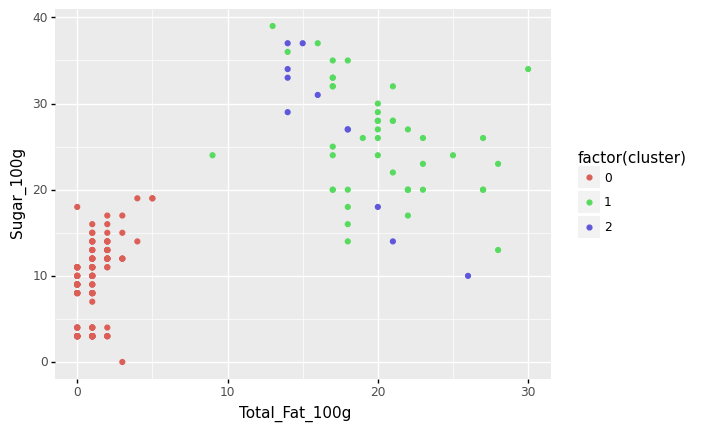

<ggplot: (339595915)>

In [200]:
(ggplot(df, aes(x = "Total_Fat_100g", y = "Sodium_100g")) + geom_point(aes(color = "factor(cluster)")))
(ggplot(df, aes(x = 'Total_Fat_100g', y = 'Sugar_100g')) + geom_point(aes(color = "factor(cluster)")))